![alternative text](../../data/logistic_regression_chatgpt.png)


In [246]:
from torch import nn
import torch
import numpy as np
from matplotlib.pylab import plt
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import make_moons


In [463]:
# Let's reuse the functions we created in the linear and non linear regression notebook
class CustomDataset(Dataset):
    def __init__(self,X,Y):
        self.X = X.clone().detach()
        self.Y = Y.clone().detach()
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]
    
# let's make this a function 

def dataset(X,Y):
    dataset = CustomDataset(X,Y)
    train_size  = int(len(X) * 0.9 )
    valid_test_size  = int(0.1*len(X))

    train_dataset, valid_test_dataset = torch.utils.data.random_split(dataset, [train_size, valid_test_size])
    valid_dataset, test_dataset = torch.utils.data.random_split(valid_test_dataset, [valid_test_size//2, valid_test_size//2])


    batch_size = 32
    train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    valid_data_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)
    return train_data_loader, valid_data_loader, test_dataset

# training
def training(train_data_loader,valid_data_loader, criterion, optimizer,num_epochs ):
    train_losses = []
    val_losses   = []


    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for inputs, labels in train_data_loader:
            optimizer.zero_grad()
            output = model(inputs) # forward prop
            loss = criterion(output,labels)
            train_loss += loss.item()
            loss.backward()
            optimizer.step()

        train_losses.append(train_loss/len(train_data_loader))

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for val_input, val_labels in valid_data_loader:
                output = model(val_input) # forward prop
                val_loss += criterion(output,val_labels).item()

            val_losses.append(val_loss/len(valid_data_loader))

        if (epoch + 1)%10==0:
            print(f'epoch {epoch+1}, train loss:{train_losses[-1]:.4f} , valid loss:{val_losses[-1]:.4f}')
    plt.plot(train_losses)
    plt.plot(val_losses)
    plt.title("training and validation loss")
    plt.legend(["Training loss","validation loss"])
    plt.show()
    
    return model
    
def testing(test_dataset):
    Xs = []
    preds = []
    ys = []
    for x,y in test_dataset:
        with torch.no_grad():
            pred = model(x).detach().numpy()
            Xs.append(x.detach().numpy())
            ys.append(y.detach().numpy())
            preds.append(pred)
    Xs = np.array(Xs)
    fig, ax = plt.subplots(1,1 ,figsize = (5,5))
    ax.scatter(Xs[:,0],Xs[:,1],c=ys,alpha =0.5)
    ax.set_title("ground truth data")
    ax.scatter(Xs[:,0],Xs[:,1],c=np.array(preds)>0.5,alpha =0.5)
    ax.set_title("ground truth data")
    plt.show()
    return np.array(ys) , np.array(preds)
    
def plot_decision_boundary(model, X, Y):
    plt.figure(figsize=(8, 6))
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    input_ = torch.tensor(np.c_[xx.ravel(), yy.ravel()],dtype = torch.float32)
    Z = model(input_).detach().numpy()
    Z = Z.reshape(xx.shape)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

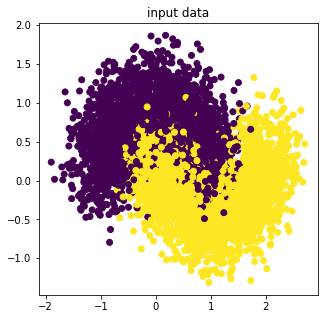

In [460]:
X, Y = make_moons(n_samples=5000, noise=0.3, random_state=42)


fig, ax = plt.subplots(1,1 ,figsize = (5,5))
ax.scatter(X[:,0],X[:,1],c=Y)
ax.set_title("input data")
plt.show()


X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32)
Y = torch.unsqueeze(Y, 1)
train_data_loader, valid_data_loader, test_dataset = dataset(X,Y)

In [391]:
class LogisticRegression(nn.Module):
    
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        
        self.linear1 = nn.Linear(input_size, 256)
        self.linear2 = nn.Linear(256, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self,x ):
        x  = self.linear1(x)
        x2 = self.linear2(x)
        x  = self.sigmoid(x2)
        
        return x 

In [392]:
input_size = X.shape[1] # number of features
model = LogisticRegression(input_size)
criterion = nn.BCELoss() # binary cross entropy 
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0001)
num_epochs = 250

epoch 10, train loss:0.4875 , valid loss:0.5115
epoch 20, train loss:0.4087 , valid loss:0.4427
epoch 30, train loss:0.3777 , valid loss:0.4184
epoch 40, train loss:0.3610 , valid loss:0.4016
epoch 50, train loss:0.3506 , valid loss:0.3954
epoch 60, train loss:0.3438 , valid loss:0.3862
epoch 70, train loss:0.3389 , valid loss:0.3848
epoch 80, train loss:0.3350 , valid loss:0.3798
epoch 90, train loss:0.3332 , valid loss:0.3780
epoch 100, train loss:0.3311 , valid loss:0.3751
epoch 110, train loss:0.3294 , valid loss:0.3756
epoch 120, train loss:0.3284 , valid loss:0.3727
epoch 130, train loss:0.3273 , valid loss:0.3728
epoch 140, train loss:0.3262 , valid loss:0.3729
epoch 150, train loss:0.3261 , valid loss:0.3714
epoch 160, train loss:0.3255 , valid loss:0.3718
epoch 170, train loss:0.3250 , valid loss:0.3712
epoch 180, train loss:0.3246 , valid loss:0.3726
epoch 190, train loss:0.3246 , valid loss:0.3699
epoch 200, train loss:0.3242 , valid loss:0.3708
epoch 210, train loss:0.3236 

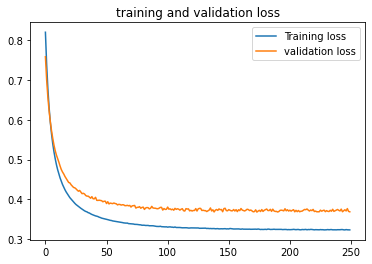

In [393]:
model = training(train_data_loader, valid_data_loader,  criterion, optimizer,num_epochs)

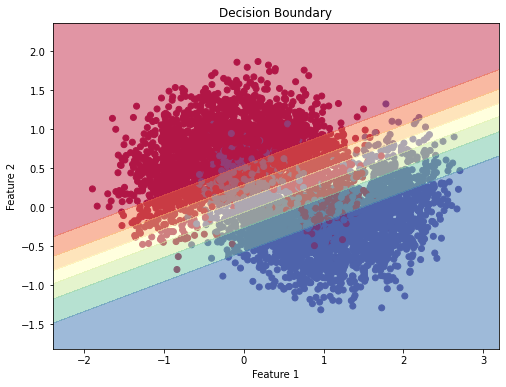

In [394]:
plot_decision_boundary(model,X, Y)

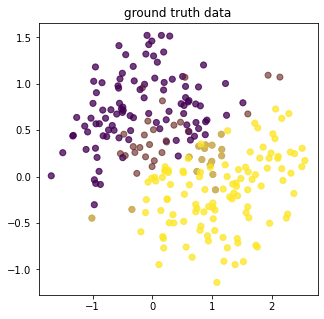

In [395]:
_= testing(test_dataset)
# here you can see logistic regression is making mistake putting the purpel classes as yellow classes

As you can see the decision boundary for logistic regression is linear. The sigmoid layer introduces non-lineary to the probabilities of each class. Logistic Regression is still a linear classifier where the decision boundary is hyperplane that is a linear-weighted combination of the input features. Think about it, decision boundary here is when P(y=1|x) = 0.5. If you do the math, 

    1/(1+exp(-x)) = 0.5 => 
    1+exp(-x) = 2
    exp(-x) = 1
    x = 0 
    And what was x? WX + B => that's a linear line. 


If we want to explore a non-linear decision, then we should introduce that non-linearity on the features themselves. Let's take a look at simple neural network. 

In [412]:
class SimpleNN(nn.Module):
    
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        
        self.linear1 = nn.Linear(input_size, 128)
        self.linear2 = nn.Linear(128, 64)
        self.linear3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
    
    def forward(self,x ):
        x  = self.relu(self.linear1(x))
        x2 = self.relu(self.linear2(x))
        x3 = self.linear3(x2)
        x  = self.sigmoid(x3)
        
        return x 

In [415]:
input_size = X.shape[1] # number of features
model = SimpleNN(input_size)
criterion = nn.BCELoss() # binary cross entropy 
optimizer = torch.optim.SGD(model.parameters(), lr = 0.005)
num_epochs = 250

epoch 10, train loss:0.3254 , valid loss:0.3683
epoch 20, train loss:0.3090 , valid loss:0.3528
epoch 30, train loss:0.2952 , valid loss:0.3374
epoch 40, train loss:0.2802 , valid loss:0.3198
epoch 50, train loss:0.2630 , valid loss:0.3032
epoch 60, train loss:0.2470 , valid loss:0.2904
epoch 70, train loss:0.2333 , valid loss:0.2744
epoch 80, train loss:0.2236 , valid loss:0.2642
epoch 90, train loss:0.2168 , valid loss:0.2573
epoch 100, train loss:0.2130 , valid loss:0.2538
epoch 110, train loss:0.2096 , valid loss:0.2534
epoch 120, train loss:0.2081 , valid loss:0.2521
epoch 130, train loss:0.2070 , valid loss:0.2510
epoch 140, train loss:0.2067 , valid loss:0.2532
epoch 150, train loss:0.2067 , valid loss:0.2609
epoch 160, train loss:0.2049 , valid loss:0.2515
epoch 170, train loss:0.2050 , valid loss:0.2561
epoch 180, train loss:0.2056 , valid loss:0.2525
epoch 190, train loss:0.2049 , valid loss:0.2540
epoch 200, train loss:0.2046 , valid loss:0.2500
epoch 210, train loss:0.2041 

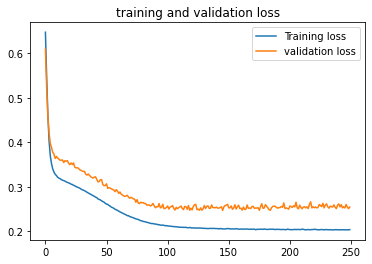

In [416]:
model = training(train_data_loader, valid_data_loader,  criterion, optimizer,num_epochs)

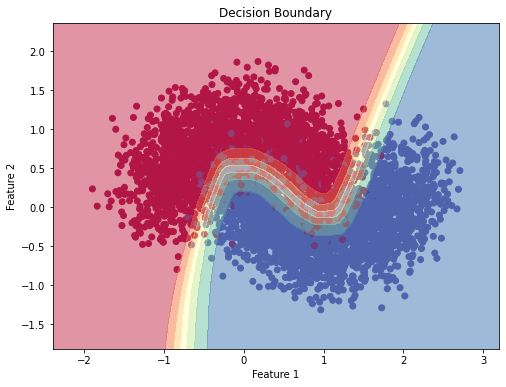

In [417]:
plot_decision_boundary(model,X, Y)
# as you can see the decision boundary for our simple neural network is non-linear

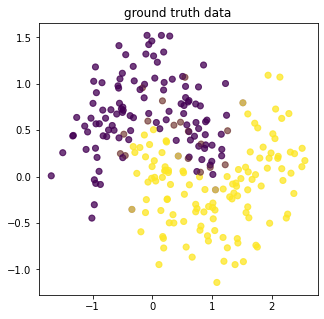

In [418]:
_= testing(test_dataset)
# and the test set is conserve that non-linear relationship as well. 

But, now let's add more layers and neuron and create a giant model. What could happen?

In [419]:
class OverKillNN(nn.Module):
    
    def __init__(self, input_size):
        super(OverKillNN, self).__init__()
        
        self.linear1 = nn.Linear(input_size, 512)
        self.linear5 = nn.Linear(512, 256)
        self.linear6 = nn.Linear(256, 128)
        self.linear7 = nn.Linear(128, 64)
        self.linear8 = nn.Linear(64, 32)
        self.linear9 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
    
    def forward(self,x ):
        x5  = self.relu(self.linear1(x))
        x6  = self.relu(self.linear5(x5))
        x7  = self.relu(self.linear6(x6))
        x8  = self.relu(self.linear7(x7))
        x9  = self.relu(self.linear8(x8))
        x10 = self.linear9(x9)
        x   = self.sigmoid(x10)
        
        return x 

In [420]:
def initialize_parameters(model):
    for name, param in model.named_parameters():
        if 'weight' in name:
            nn.init.xavier_uniform_(param)
        if 'bias' in name:
            nn.init.constant_(param, 0)

In [421]:
input_size = X.shape[1] # number of features
model = OverKillNN(input_size)
initialize_parameters(model)
criterion = nn.BCELoss() # binary cross entropy 
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
num_epochs = 350

epoch 10, train loss:0.2128 , valid loss:0.2649
epoch 20, train loss:0.2079 , valid loss:0.2525
epoch 30, train loss:0.2059 , valid loss:0.2635
epoch 40, train loss:0.2015 , valid loss:0.2697
epoch 50, train loss:0.2051 , valid loss:0.2740
epoch 60, train loss:0.2016 , valid loss:0.2833
epoch 70, train loss:0.2022 , valid loss:0.2729
epoch 80, train loss:0.1994 , valid loss:0.2870
epoch 90, train loss:0.1985 , valid loss:0.2756
epoch 100, train loss:0.1989 , valid loss:0.2644
epoch 110, train loss:0.1975 , valid loss:0.2802
epoch 120, train loss:0.1969 , valid loss:0.2614
epoch 130, train loss:0.1954 , valid loss:0.2968
epoch 140, train loss:0.1938 , valid loss:0.2856
epoch 150, train loss:0.1908 , valid loss:0.2773
epoch 160, train loss:0.1902 , valid loss:0.3004
epoch 170, train loss:0.1904 , valid loss:0.2808
epoch 180, train loss:0.1877 , valid loss:0.2741
epoch 190, train loss:0.1879 , valid loss:0.2980
epoch 200, train loss:0.1840 , valid loss:0.3328
epoch 210, train loss:0.1855 

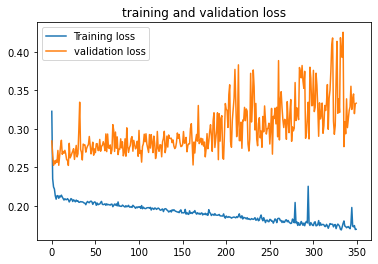

In [422]:
model = training(train_data_loader, valid_data_loader,  criterion, optimizer,num_epochs)

We overfit the model. We have a "Crazy" decision boundary. Now, we can explore ways to regularize it. 

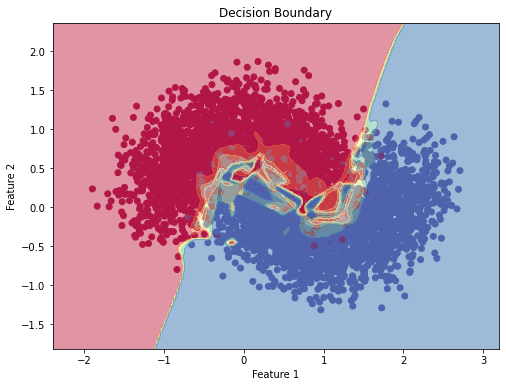

In [423]:
plot_decision_boundary(model,X, Y)

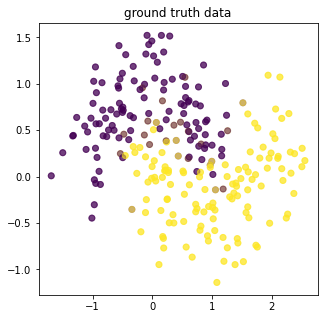

In [424]:
labels , predictions = testing(test_dataset)

So, far we're looking at the loss and visualizing the dataset. But, we should be doing this objectivly. 

In [425]:
import sklearn.metrics as metrics

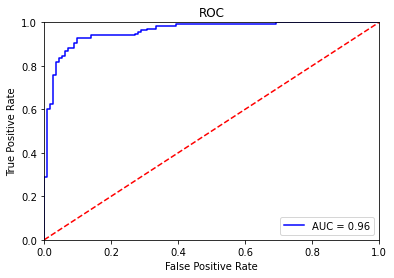

In [426]:
fpr, tpr, threshold = metrics.roc_curve(labels, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.title('ROC')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

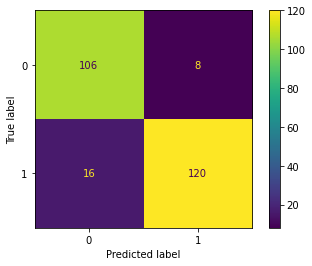

In [427]:
cm = metrics.confusion_matrix(labels, predictions>0.5)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
# about similar performance on FP and FN 

In [471]:
# training with regularization
def training_with_l1_regularization(train_data_loader,valid_data_loader, criterion, optimizer,num_epochs,lambda_l1=0.001 ):
    train_losses = []
    val_losses   = []


    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for inputs, labels in train_data_loader:
            optimizer.zero_grad()
            output = model(inputs) # forward prop
            loss = criterion(output,labels)
            ## Adding L1 regularization after calculating the loss before backward prop
            l1 = 0
            for p in model.parameters():
                l1 = l1 + p.abs().sum()
            loss = loss + lambda_l1 * l1
            train_loss += loss.item()
            loss.backward()
            optimizer.step()

        train_losses.append(train_loss/len(train_data_loader))

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for val_input, val_labels in valid_data_loader:
                output = model(val_input) # forward prop
                val_loss += criterion(output,val_labels).item()

            val_losses.append(val_loss/len(valid_data_loader))

        if (epoch + 1)%10==0:
            print(f'epoch {epoch+1}, train loss:{train_losses[-1]:.4f} , valid loss:{val_losses[-1]:.4f}')
    plt.plot(train_losses)
    plt.plot(val_losses)
    plt.title("training and validation loss")
    plt.legend(["Training loss","validation loss"])
    plt.show()
    
    return model

# training with regularization
def training_with_l2_regularization(train_data_loader,valid_data_loader, criterion, optimizer,num_epochs,lambda_l2=0.001 ):
    train_losses = []
    val_losses   = []


    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for inputs, labels in train_data_loader:
            optimizer.zero_grad()
            output = model(inputs) # forward prop
            loss = criterion(output,labels)
            ## Adding L1 regularization after calculating the loss before backward prop
            l2 = 0
            for p in model.parameters():
                l2 = l2 + ((p**2).sum())
            loss = loss + lambda_l2 * l2
            train_loss += loss.item()
            loss.backward()
            optimizer.step()

        train_losses.append(train_loss/len(train_data_loader))

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for val_input, val_labels in valid_data_loader:
                output = model(val_input) # forward prop
                val_loss += criterion(output,val_labels).item()

            val_losses.append(val_loss/len(valid_data_loader))

        if (epoch + 1)%10==0:
            print(f'epoch {epoch+1}, train loss:{train_losses[-1]:.4f} , valid loss:{val_losses[-1]:.4f}')
    plt.plot(train_losses)
    plt.plot(val_losses)
    plt.title("training and validation loss")
    plt.legend(["Training loss","validation loss"])
    plt.show()
    
    return model

epoch 10, train loss:0.3660 , valid loss:0.2063
epoch 20, train loss:0.3287 , valid loss:0.2026
epoch 30, train loss:0.3090 , valid loss:0.2082
epoch 40, train loss:0.3019 , valid loss:0.2002
epoch 50, train loss:0.2965 , valid loss:0.2034
epoch 60, train loss:0.2946 , valid loss:0.2030
epoch 70, train loss:0.2893 , valid loss:0.2076
epoch 80, train loss:0.2869 , valid loss:0.2022
epoch 90, train loss:0.2861 , valid loss:0.2054
epoch 100, train loss:0.2848 , valid loss:0.2115
epoch 110, train loss:0.2829 , valid loss:0.2027
epoch 120, train loss:0.2811 , valid loss:0.1974
epoch 130, train loss:0.2789 , valid loss:0.2012
epoch 140, train loss:0.2791 , valid loss:0.2028
epoch 150, train loss:0.2772 , valid loss:0.1979
epoch 160, train loss:0.2754 , valid loss:0.1994
epoch 170, train loss:0.2759 , valid loss:0.2015
epoch 180, train loss:0.2754 , valid loss:0.2000
epoch 190, train loss:0.2743 , valid loss:0.2009
epoch 200, train loss:0.2714 , valid loss:0.1983
epoch 210, train loss:0.2716 

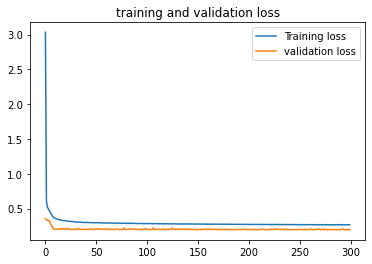

In [466]:
# L1 Norm - Lasso Regression 
input_size = X.shape[1] # number of features
model = OverKillNN(input_size)
initialize_parameters(model)
criterion = nn.BCELoss() # binary cross entropy 
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
num_epochs = 300
model = training_with_l1_regularization(train_data_loader, valid_data_loader,  criterion, optimizer,num_epochs)

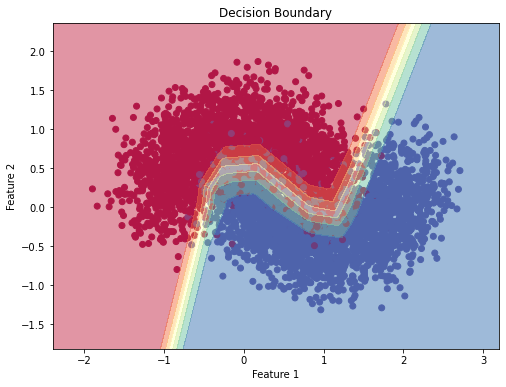

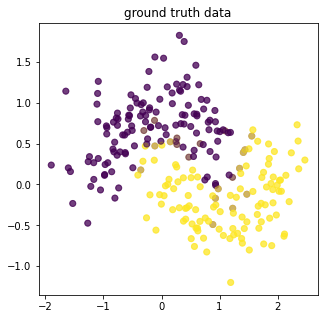

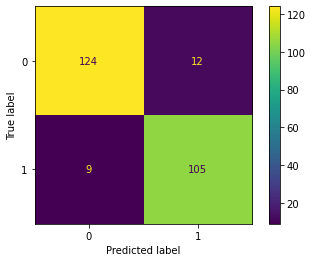

In [472]:
plot_decision_boundary(model,X, Y)
labels , predictions = testing(test_dataset)
cm = metrics.confusion_matrix(labels, predictions>0.5)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()

epoch 10, train loss:0.2593 , valid loss:0.2013
epoch 20, train loss:0.2494 , valid loss:0.2098
epoch 30, train loss:0.2460 , valid loss:0.2028
epoch 40, train loss:0.2434 , valid loss:0.2260
epoch 50, train loss:0.2419 , valid loss:0.2181
epoch 60, train loss:0.2402 , valid loss:0.2047
epoch 70, train loss:0.2399 , valid loss:0.2005
epoch 80, train loss:0.2407 , valid loss:0.1983
epoch 90, train loss:0.2408 , valid loss:0.2055
epoch 100, train loss:0.2442 , valid loss:0.2136
epoch 110, train loss:0.2418 , valid loss:0.1991
epoch 120, train loss:0.2411 , valid loss:0.2055
epoch 130, train loss:0.2423 , valid loss:0.1981
epoch 140, train loss:0.2377 , valid loss:0.2019
epoch 150, train loss:0.2412 , valid loss:0.1963
epoch 160, train loss:0.2360 , valid loss:0.1931
epoch 170, train loss:0.2399 , valid loss:0.2066
epoch 180, train loss:0.2390 , valid loss:0.2004
epoch 190, train loss:0.2386 , valid loss:0.2061
epoch 200, train loss:0.2368 , valid loss:0.1987
epoch 210, train loss:0.2390 

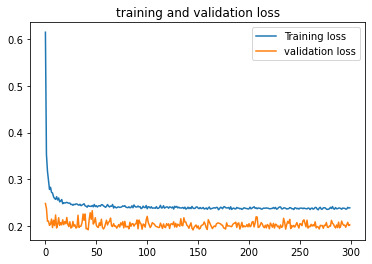

In [473]:
# L2 Norm - Ridge Regression 
input_size = X.shape[1] # number of features
model = OverKillNN(input_size)
initialize_parameters(model)
criterion = nn.BCELoss() # binary cross entropy 
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
num_epochs = 300
model = training_with_l2_regularization(train_data_loader, valid_data_loader,  criterion, optimizer,num_epochs)

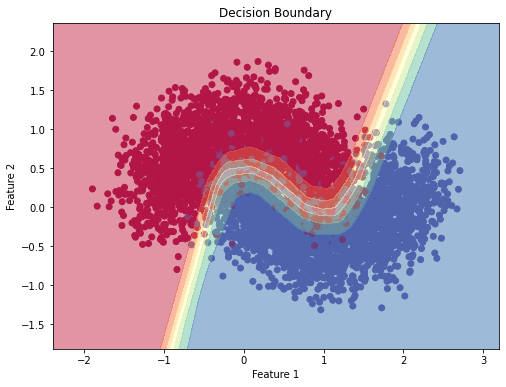

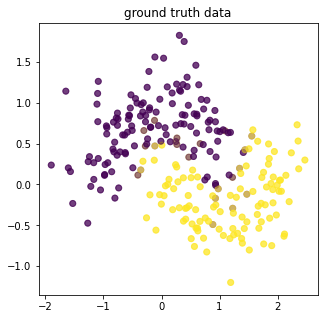

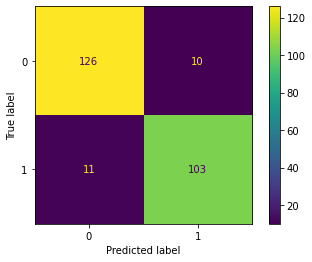

In [474]:
plot_decision_boundary(model,X, Y)
labels , predictions = testing(test_dataset)
cm = metrics.confusion_matrix(labels, predictions>0.5)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()

In [493]:
# Drop-out
class OverKillNNDropOut(nn.Module):
    
    def __init__(self, input_size):
        super(OverKillNN, self).__init__()
        
        self.linear1 = nn.Linear(input_size, 512)
        self.linear5 = nn.Linear(512, 256)
        self.linear6 = nn.Linear(256, 128)
        self.linear7 = nn.Linear(128, 64)
        self.linear8 = nn.Linear(64, 32)
        self.linear9 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.7)
    
    def forward(self,x ):
        x5  = self.dropout(self.relu(self.linear1(x)))
        x6  = self.dropout(self.relu(self.linear5(x5)))
        x7  = self.dropout(self.relu(self.linear6(x6)))
        x8  = self.dropout(self.relu(self.linear7(x7)))
        x9  = self.dropout(self.relu(self.linear8(x8)))
        x10 = self.dropout(self.linear9(x9))
        x   = self.sigmoid(x10)
        
        return x 

epoch 10, train loss:0.2176 , valid loss:0.1975
epoch 20, train loss:0.2117 , valid loss:0.2043
epoch 30, train loss:0.2093 , valid loss:0.2024
epoch 40, train loss:0.2106 , valid loss:0.2047
epoch 50, train loss:0.2096 , valid loss:0.2103
epoch 60, train loss:0.2072 , valid loss:0.2083
epoch 70, train loss:0.2063 , valid loss:0.2076
epoch 80, train loss:0.2028 , valid loss:0.2094
epoch 90, train loss:0.2046 , valid loss:0.2063
epoch 100, train loss:0.2025 , valid loss:0.2085
epoch 110, train loss:0.2013 , valid loss:0.2091
epoch 120, train loss:0.2022 , valid loss:0.1965
epoch 130, train loss:0.2007 , valid loss:0.2205
epoch 140, train loss:0.2015 , valid loss:0.2208
epoch 150, train loss:0.1970 , valid loss:0.2024
epoch 160, train loss:0.1972 , valid loss:0.2134
epoch 170, train loss:0.1946 , valid loss:0.2241
epoch 180, train loss:0.1931 , valid loss:0.2126
epoch 190, train loss:0.1937 , valid loss:0.2097
epoch 200, train loss:0.1922 , valid loss:0.2213


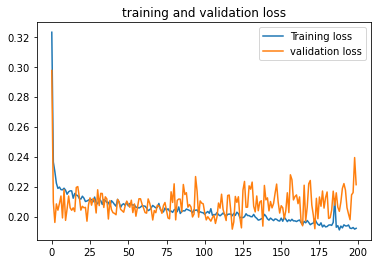

In [494]:
# Dropout 
input_size = X.shape[1] # number of features
model = OverKillNN(input_size)
initialize_parameters(model)
criterion = nn.BCELoss() # binary cross entropy 
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
num_epochs = 200
model = training(train_data_loader, valid_data_loader,  criterion, optimizer,num_epochs)

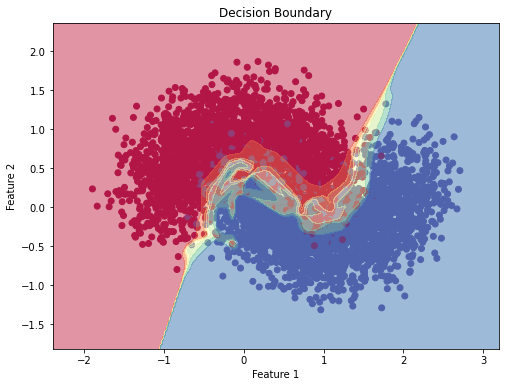

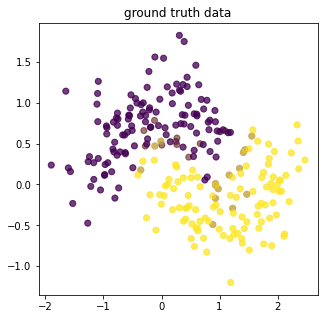

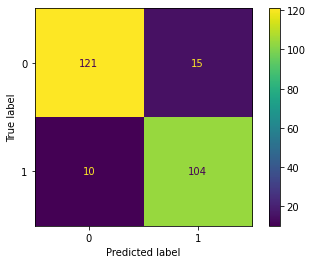

In [495]:
plot_decision_boundary(model,X, Y)
labels , predictions = testing(test_dataset)
cm = metrics.confusion_matrix(labels, predictions>0.5)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()